# Introduction to Machine learning classification with PyTorch

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torch import nn# nn contains all of PyTorch's building blocks for neural networks
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from pathlib import Path

# Remember to setup the code to be device-agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

%matplotlib inline

cuda


## Classification

The objective of classification is to assign a "category" to different objects. For example, image classification looks at specific things in the pixels and their surroundings to determine if they are a certain object.

Classification can be binary when we only have two target categories or multilevel when we have multiple categories. Multilabel classification is another category in where every object has multiple labels that can help classifying an object.

Commonly, classification is used in image classification, either the whole image or elements of the image. Images are 2D arrays that sometimes have multiple color channels, and can be batch of images, and thus they can be numerically encoded into tensors. The output of classification models normally are probabilities that an image or object belongs to a certain class and, based on predetermined or tunable thresholds, assign the class.

## Architecture of a classifcation model

| Hyperparameter  | Binary classification  | Multiclass classification   |
|---|---|---|
| Input layer shape (in_features)  |Same as number of features (i.e, if the features are place, altitude, temperature, we have three)   | Same as in binary classification  |
|Hidden layer(s)   |Problem specific, the lower limit is 1, but there is no upper limit   |Same as in binary classification   |
|Neurons per hidden layer   |Problem specific, in the range of 10 to 512   |Same as in binary classification   |
|Output layer shape   |1 (one or another)   |1 per class output   |
|Hidden layer activation   |Usually Rectified Linear Units (ReLUs)   |Same as in binary classification   |
|Output activation   |Sigmoid ( torch.sigmoid`)   |Softmax (`torch.softmax`)   |
|Loss function   |Binary Cross Entropy (`torch.nn.BCELoss`)   |Cross entropy (`torch.nn.CrossEntropyLoss`)   |
|Optimizer   |Stochastic Gradient Descent (SGD), Adam   |Same as in binary classification   |

In [2]:
## Make classification data: 1000 samples using scikit-learn's make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.05, random_state=25)

print(f"First 5 samples of X: {X[0:5]}") 
print(f"First 5 samples of y: {y[0:5]}") 

First 5 samples of X: [[-0.55888682  0.56966993]
 [ 0.76781605  0.64286461]
 [-0.82691702 -0.46853557]
 [-0.57801678  0.50993775]
 [-0.79854195 -0.27912479]]
First 5 samples of y: [1 0 0 1 1]


We see that on the label array (y) we have only 0 and 1 values, which are our binary outputs

         X0        X1  y
0 -0.558887  0.569670  1
1  0.767816  0.642865  0
2 -0.826917 -0.468536  0
3 -0.578017  0.509938  1
4 -0.798542 -0.279125  1


Text(0.5, 1.0, 'Testing data')

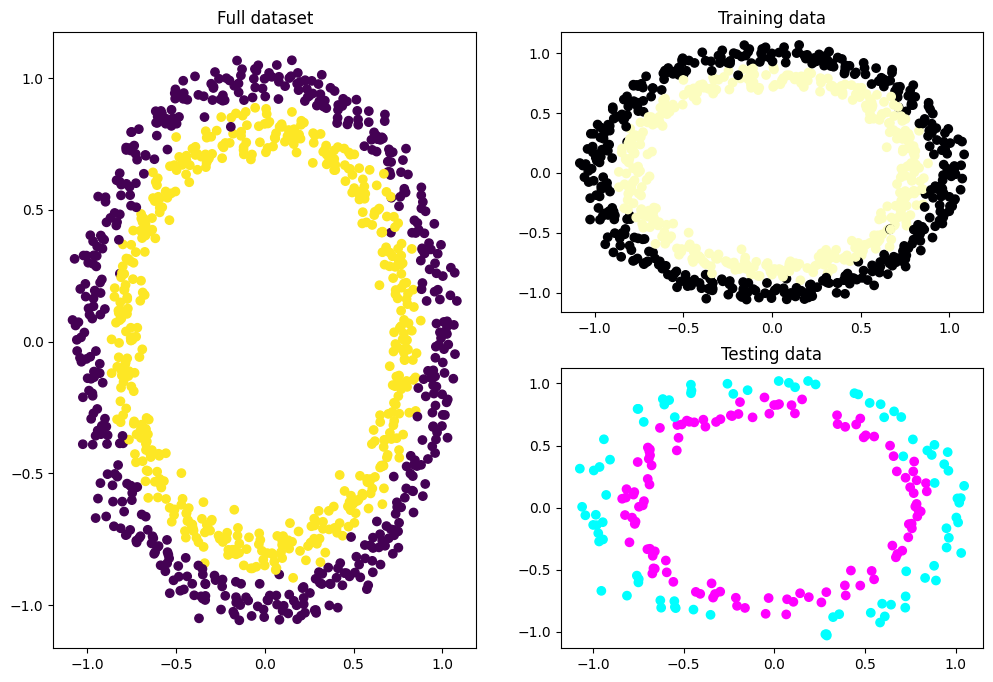

In [3]:
# Make a DataFrame of the circle data

circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "y":y})
print(circles.head())

# We can also plot the data
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.scatter(circles.X0, circles.X1, c=y)
plt.title("Full dataset")

# And perform a train-test split for the model training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

# As well as visualizing that data also
plt.subplot(2,2,2)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap="magma")
plt.title("Training data")

plt.subplot(2,2,4)
plt.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap="cool")
plt.title("Testing data")


We see that we have our two outputs which, in principle, appear to have little overlap

In [4]:
# To use our data for training, we need to convert our data to tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# We can re-split the data, as by using the seed we make the example reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)



In [5]:
# Building the classification by subclassing nn.Module

class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Create 2 nn.Linear layers 
        self.layer_1 = nn.Linear(in_features=2, # The number of features of each point (the two coordinates)
                                 out_features=5) # Output of nodes in the next later (arbitrary)
        # Layer 1 upscales from 2 to 5 features
        #
        self.layer_2 = nn.Linear(in_features=5, # The number of nodes of the previous layer
                                 out_features=1) #Standard for binary classification
        # Layer 2 downscales back to the output value
        
        
    # Define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # The layers perform the calculation as we defined using nn.Linear
        
# Instantiate an instance of our model class
model_0 = CircleClassifier().to('cpu')

print(model_0)

print(model_0.state_dict())

CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)
OrderedDict([('layer_1.weight', tensor([[ 0.1450,  0.3508],
        [-0.2241, -0.0184],
        [ 0.5343,  0.5402],
        [-0.4847, -0.5856],
        [ 0.1712, -0.5508]])), ('layer_1.bias', tensor([ 0.1743,  0.2220,  0.2157,  0.4471, -0.5550])), ('layer_2.weight', tensor([[-0.0033,  0.2274,  0.3167, -0.4099, -0.2386]])), ('layer_2.bias', tensor([0.1485]))])


You can see that our model has already generated random values for weights and biases.

If you want to have a more visual understanding of the networks, you can use the [TensorFlow playground](http://playground.tensorflow.org)

Now we make the untrained predictions

In [6]:
untrained_pred = model_0(X_test.to('cpu'))
print(f"\nFirst 10 predictions:\n{untrained_pred[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")
print(f"\nShape of the predictions:\n{untrained_pred.shape}")
print(f"\nShape of the test tensor:\n{y_test.shape}")



First 10 predictions:
tensor([[ 0.2362],
        [ 0.5986],
        [ 0.5505],
        [-0.1541],
        [ 0.5734],
        [ 0.8136],
        [ 0.6955],
        [ 0.6203],
        [ 0.6339],
        [ 0.8331]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 1., 1., 0., 0., 1., 0., 0.])

Shape of the predictions:
torch.Size([200, 1])

Shape of the test tensor:
torch.Size([200])


Here we see that the tensor shape of the predictions and the test data is different. This can be corrected later

First, let's set up the training process

In [7]:
# Setup a loss function
loss_fn = nn.BCEWithLogitsLoss() #Binary Cross Entropy loss with a built-in sigmoid layer

## However, for more complex models it's better to separate the BCE (nn.BCELoss) from the sigmoid (torch.sigmoid), as it also allows you to use different functions in the layer

# Setup an optimizer

optim_fn = torch.optim.SGD(params = model_0.parameters(), # We say to use the parameters of our model
                          lr = 0.1) # lr is the 'learning rate' which is set manually by the user. A common value is 0.01. The higher lr, the higher the magnitude of change of the model parameters

# We can also define an evaluation metric, for example, model accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

# However, as we saw before the values the predictions throw are hard to interpret in the context of our binary classification. We can transform them into probabilities using PyTorch's sigmoid activation function

y_untrained_pred_probs = torch.sigmoid(untrained_pred)

y_untrained_pred_probs[:5]

print(f"\nFirst 5 raw predictions:\n{untrained_pred[:10]}")
print(f"\nFirst 5 transformed predictions:\n{y_untrained_pred_probs[:10]}")



First 5 raw predictions:
tensor([[ 0.2362],
        [ 0.5986],
        [ 0.5505],
        [-0.1541],
        [ 0.5734],
        [ 0.8136],
        [ 0.6955],
        [ 0.6203],
        [ 0.6339],
        [ 0.8331]], grad_fn=<SliceBackward0>)

First 5 transformed predictions:
tensor([[0.5588],
        [0.6453],
        [0.6342],
        [0.4615],
        [0.6395],
        [0.6929],
        [0.6672],
        [0.6503],
        [0.6534],
        [0.6970]], grad_fn=<SliceBackward0>)


The values went from negative values to positive values. More importantly, these transformed values represent prediction probabilities. As we are between 0 and 1, the closer the prediction value is to either, the more the model "thinks" it belongs to that category.

To this end, we can round the values while also transforming the tensors with the squeeze function so they will have the same shape as the output

In [8]:
# Round the prediction values
y_untrained_pred = torch.round(y_untrained_pred_probs)

# Include the rounding in the prediction
y_untrained_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to('cpu'))))


# Check for equality
print(torch.eq(y_untrained_pred.squeeze(), y_untrained_pred_labels.squeeze()))

# Get rid of extra dimension
y_untrained_pred.squeeze().shape

print(f"\nShape of the squeezed predictions:\n{y_untrained_pred.squeeze().shape}")
print(f"\nShape of the test tensor:\n{y_test.shape}")

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

Since we now have equally sized tensors, we can build our train-test loop!

In [32]:

torch.manual_seed(31)

# Define the number of epochs, which is the times the data is looped

epochs = 100


# Put data to target device
X_train, y_train = X_train.to('cpu'), y_train.to('cpu')
X_test, y_test = X_test.to('cpu'), y_test.to('cpu')


# Track different values 
epoch_count = []
train_loss_values = []
test_loss_values = []

# Build the training loop

for epoch in range(epochs):
    
    # Set the model to training mode
    model_0.train()
    
    # Forward pass
    y_logits = model_0(X_train).squeeze() # Remove extra dimension
    y_prediction = torch.round(torch.sigmoid(y_logits)) # Transform outputs into labels
    
    # Loss function
    loss = loss_fn(y_logits, y_train)
    
    acc = accuracy_fn(y_true=y_train,y_pred=y_prediction)
    
    # Optimizer sero grad
    optim_fn.zero_grad()
    
    # Loss backpropagation
    loss.backward()
    
    # Gradient descent
    optim_fn.step()
    
    
    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation or testing
    
    with torch.inference_mode(): # Turns off gradient tracking
        
        # Forward pass
        
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # Loss calculation
        test_loss = loss_fn(test_pred, y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch % 10 == 0: 
        
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        
    
# Now try the model

with torch.inference_mode():
    y_preds_new = model_0(X_test)

Epoch: 0 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 10 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 20 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 30 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 40 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 50 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 60 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 70 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 80 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%
Epoch: 90 | Loss: 0.69339 , Accuracy: 49.00% | Test loss: 0.73278, Test acc: 43.50%


There are a few problems that are easy to spot. 
- The loss is consistently pretty high, so in every iteration we are losing roughly the same amount of information
- The accuracy of both the training and testing is pretty low, barely over 50%

If we consider that we are in a binary classification, accuracy of 50% is roughly saying that you can guess the value correctly with a random guess.

An option would be to evaluate the model and then visualize what is actually predictin.

In the [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning) there is a set of functions in the repo ([`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)) that will help with the visualization. We'll use two: 
- `plot_decision_boundary` which will show the different points that our model considers for each class
- `plot_predictions`, which is the same that we used in the chapter 2 for our linear regression data

The code for both functions will be at the end of the notebook

In [33]:
# Import the functions

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


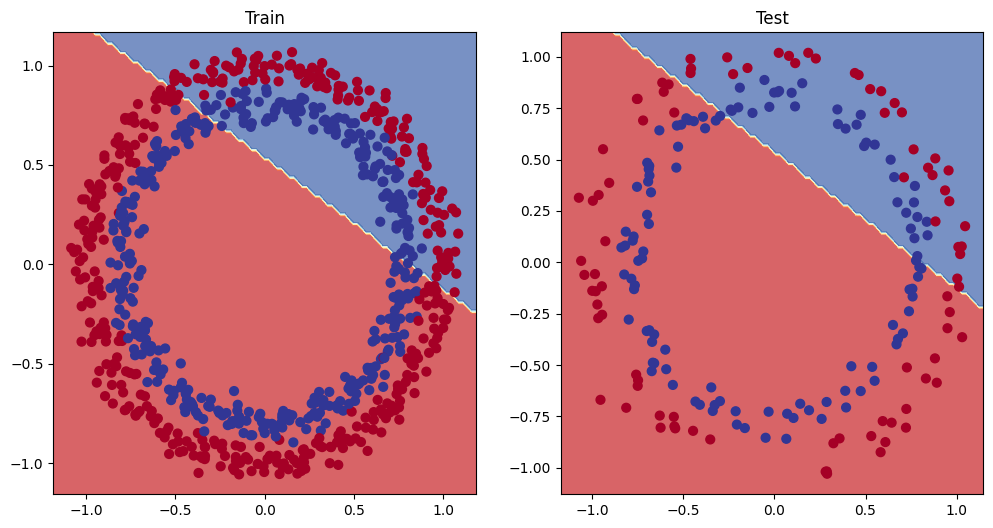

In [34]:
# Plot the data and decision results 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

As we see, the model is trying to split the data using a **straight line**, which explains the ~50% accuracy values. Because or data is non-linear, this is not the best way to do the split, we would require a **non-linear activation function**. Before this, however, we will first see how to improve the model from the model's perspective. Normally these are the things that can be done:

- Add more layers, potentially increasing the model learning capabilities (making the model deeper)
- Add more hidden units, potentially increasing the model learning capabilities (making the model wider)
- Increase the number of epochs, giving more learning opportunities
- Changing the activation functions, as some are more appropriate for different types of data
- Change the learning rate, if it's too much, the model overcorrects, and if it's too little, the model doesn't change enough so it can't learn
- Change the loss function, similar to activations, some functions don't work well for certain problems (i.e. BCE for a multilevel classification)
- Use transfer learning, building on top of a pre-existing model may require little tuning to obtain the desired result

In [55]:
# Model optimization

class CircleClassifier_V2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=20)
        self.layer_2 = nn.Linear(in_features=20, out_features=25)
        self.layer_3 = nn.Linear(in_features=25, out_features=15)
        self.layer_4 = nn.Linear(in_features=15, out_features=1)
        
    def forward(self,x):
        return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))
    
model_V2 = CircleClassifier_V2().to('cpu')
model_V2


CircleClassifier_V2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=25, bias=True)
  (layer_3): Linear(in_features=25, out_features=15, bias=True)
  (layer_4): Linear(in_features=15, out_features=1, bias=True)
)

In [58]:
# Now build the new training loop

torch.manual_seed(35)

# Setup a loss function
loss_fn = nn.BCEWithLogitsLoss() #Binary Cross Entropy loss with a built-in sigmoid layer

## However, for more complex models it's better to separate the BCE (nn.BCELoss) from the sigmoid (torch.sigmoid), as it also allows you to use different functions in the layer

# Setup an optimizer

optim_fn = torch.optim.SGD(params = model_V2.parameters(), # We say to use the parameters of our model
                          lr = 0.001) # lr is the 'learning rate' which is set manually by the user. A common value is 0.01. The higher lr, the higher the magnitude of change of the model parameters

# Define the number of epochs, which is the times the data is looped

epochs = 1000


# Put data to target device
X_train, y_train = X_train.to('cpu'), y_train.to('cpu')
X_test, y_test = X_test.to('cpu'), y_test.to('cpu')


# Track different values 
epoch_count = []
train_loss_values = []
test_loss_values = []

# Build the training loop

for epoch in range(epochs):
    
    # Set the model to training mode
    model_V2.train()
    
    # Forward pass
    y_logits = model_V2(X_train).squeeze() # Remove extra dimension
    y_prediction = torch.round(torch.sigmoid(y_logits)) # Transform outputs into labels
    
    # Loss function
    loss = loss_fn(y_logits, y_train)
    
    acc = accuracy_fn(y_true=y_train,y_pred=y_prediction)
    
    # Optimizer zero grad
    optim_fn.zero_grad()
    
    # Loss backpropagation
    loss.backward()
    
    # Gradient descent
    optim_fn.step()
    
    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation or testing
    
    with torch.inference_mode(): # Turns off gradient tracking
        
        # Forward pass
        
        test_logits = model_V2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # Loss calculation
        test_loss = loss_fn(test_pred, y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch % 100 == 0: 
        
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        

Epoch: 0 | Loss: 0.69386 , Accuracy: 51.62% | Test loss: 0.70083, Test acc: 59.50%
Epoch: 100 | Loss: 0.69374 , Accuracy: 51.00% | Test loss: 0.69672, Test acc: 59.00%
Epoch: 200 | Loss: 0.69363 , Accuracy: 49.75% | Test loss: 0.69452, Test acc: 58.00%
Epoch: 300 | Loss: 0.69353 , Accuracy: 49.38% | Test loss: 0.69971, Test acc: 56.00%
Epoch: 400 | Loss: 0.69345 , Accuracy: 50.25% | Test loss: 0.70351, Test acc: 55.00%
Epoch: 500 | Loss: 0.69337 , Accuracy: 49.75% | Test loss: 0.70371, Test acc: 54.00%
Epoch: 600 | Loss: 0.69331 , Accuracy: 48.75% | Test loss: 0.71080, Test acc: 51.50%
Epoch: 700 | Loss: 0.69325 , Accuracy: 48.75% | Test loss: 0.71720, Test acc: 49.50%
Epoch: 800 | Loss: 0.69319 , Accuracy: 48.50% | Test loss: 0.72119, Test acc: 47.50%
Epoch: 900 | Loss: 0.69315 , Accuracy: 48.25% | Test loss: 0.71449, Test acc: 48.00%


Again, the problem persists even with a model optimization, let's visualize it

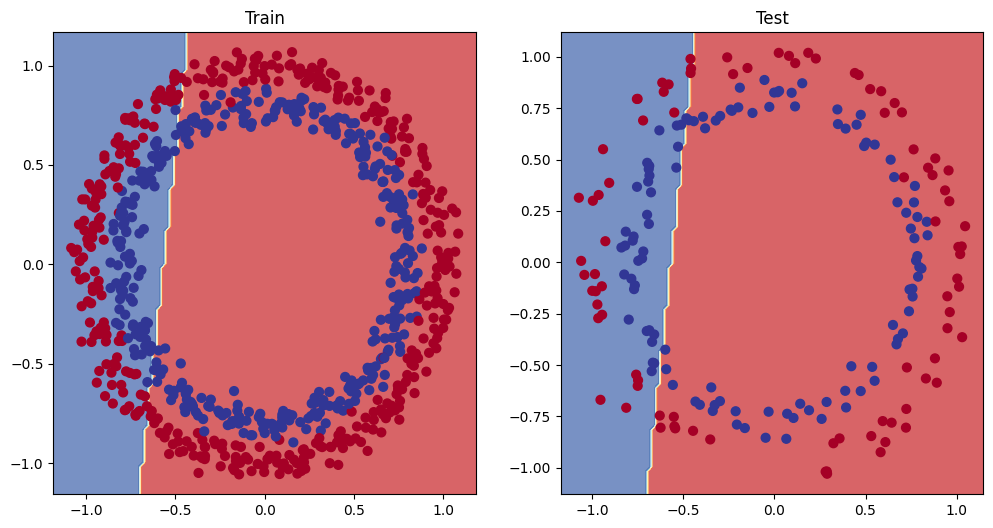

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_V2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_V2, X_test, y_test)


Even with the model tuning and optimization, the accuracy is still very low, clearly the problem is the linearity of our activation.

**So let's build a model with non-linearity**

One of the most common non-linear activation functions is called *Rectified Linear Units (ReLU)*. Basically, for y values lower than 0, the ReLU will output 0, only "activating" por positives values. We can compare how it looks on a toy tensor comparing linear, ReLU and sigmoid activations

Text(0.5, 1.0, 'Sigmoid')

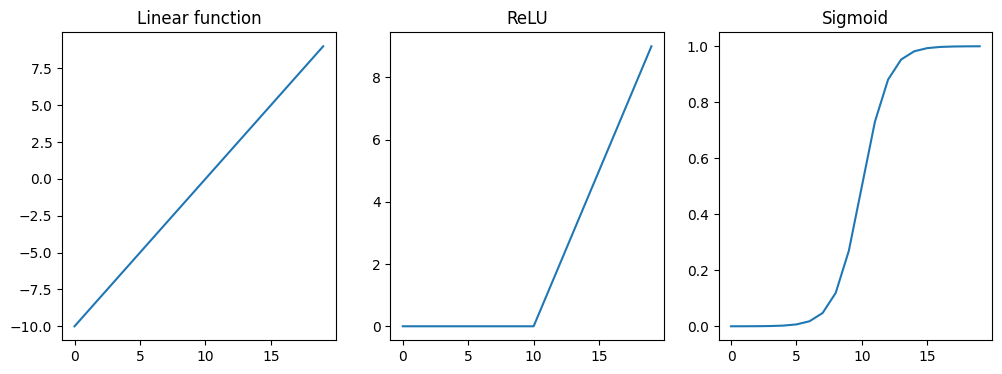

In [77]:
def relu(x):
    return torch.maximum(torch.tensor(0),x)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

toyTensor = torch.arange(-10,10,1,dtype=torch.float32)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(toyTensor)
plt.title("Linear function")

plt.subplot(1,3,2)
plt.plot(relu(toyTensor))
plt.title("ReLU")

plt.subplot(1,3,3)
plt.plot(sigmoid(toyTensor))
plt.title("Sigmoid")

In [63]:
#Non-linear model

class CircleClassifier_V3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # Rectified Linear Units activation, a non-linear activation function
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_V3 = CircleClassifier_V3().to('cpu')
print(model_V3)

CircleClassifier_V3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [67]:
# Now build the new training loop

torch.manual_seed(35)

# Setup a loss function
loss_fn = nn.BCEWithLogitsLoss() #Binary Cross Entropy loss with a built-in sigmoid layer

## However, for more complex models it's better to separate the BCE (nn.BCELoss) from the sigmoid (torch.sigmoid), as it also allows you to use different functions in the layer

# Setup an optimizer

optim_fn = torch.optim.SGD(params = model_V3.parameters(), # We say to use the parameters of our model
                          lr = 0.1) # lr is the 'learning rate' which is set manually by the user. A common value is 0.01. The higher lr, the higher the magnitude of change of the model parameters

# Define the number of epochs, which is the times the data is looped

epochs = 1000


# Put data to target device
X_train, y_train = X_train.to('cpu'), y_train.to('cpu')
X_test, y_test = X_test.to('cpu'), y_test.to('cpu')


# Track different values 
epoch_count = []
train_loss_values = []
test_loss_values = []

# Build the training loop

for epoch in range(epochs):
    
    # Set the model to training mode
    model_V2.train()
    
    # Forward pass
    y_logits = model_V3(X_train).squeeze() # Remove extra dimension
    y_prediction = torch.round(torch.sigmoid(y_logits)) # Transform outputs into labels
    
    # Loss function
    loss = loss_fn(y_logits, y_train)
    
    acc = accuracy_fn(y_true=y_train,y_pred=y_prediction)
    
    # Optimizer zero grad
    optim_fn.zero_grad()
    
    # Loss backpropagation
    loss.backward()
    
    # Gradient descent
    optim_fn.step()
    
    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation or testing
    
    with torch.inference_mode(): # Turns off gradient tracking
        
        # Forward pass
        
        test_logits = model_V3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # Loss calculation
        test_loss = loss_fn(test_pred, y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch % 100 == 0: 
        
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

Epoch: 0 | Loss: 0.68472 , Accuracy: 60.25% | Test loss: 0.65597, Test acc: 55.50%
Epoch: 100 | Loss: 0.67968 , Accuracy: 60.00% | Test loss: 0.65706, Test acc: 53.00%
Epoch: 200 | Loss: 0.67309 , Accuracy: 61.62% | Test loss: 0.64946, Test acc: 55.00%
Epoch: 300 | Loss: 0.66339 , Accuracy: 64.62% | Test loss: 0.63547, Test acc: 59.00%
Epoch: 400 | Loss: 0.64766 , Accuracy: 70.25% | Test loss: 0.60577, Test acc: 66.50%
Epoch: 500 | Loss: 0.62223 , Accuracy: 80.75% | Test loss: 0.55569, Test acc: 80.00%
Epoch: 600 | Loss: 0.57717 , Accuracy: 90.88% | Test loss: 0.51200, Test acc: 91.50%
Epoch: 700 | Loss: 0.50266 , Accuracy: 94.12% | Test loss: 0.50371, Test acc: 94.00%
Epoch: 800 | Loss: 0.39629 , Accuracy: 95.38% | Test loss: 0.50041, Test acc: 95.50%
Epoch: 900 | Loss: 0.28193 , Accuracy: 96.88% | Test loss: 0.49161, Test acc: 97.50%


Finally! Now we see a decrease in the loss function and a steady increase in the model accuracy!! How does it show visually?

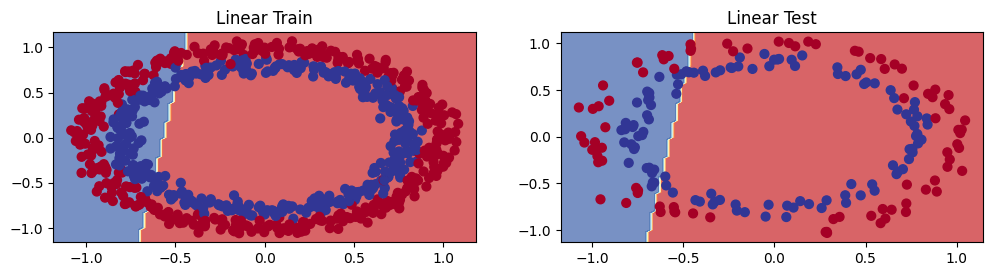

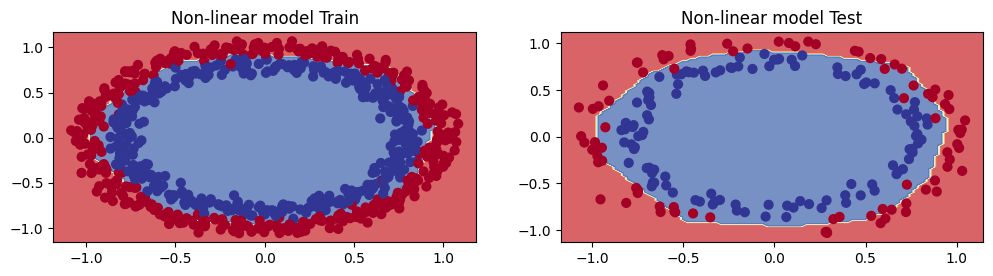

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title("Linear Train")
plot_decision_boundary(model_V2, X_train, y_train)
plt.subplot(2, 2, 2)
plt.title("Linear Test")
plot_decision_boundary(model_V2, X_test, y_test)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.title("Non-linear model Train")
plot_decision_boundary(model_V3, X_train, y_train)
plt.subplot(2, 2, 4)
plt.title("Non-linear model Test")
plot_decision_boundary(model_V3, X_test, y_test)

Excellent! We successfully created a binary classification model using PyTorch! Now we can save our model for future deployment

In [83]:
Mods_Path = Path("models")

Mod_Name = "02_binary_classification_circles_model.pth" # .pth and .pt are standard PyTorch file extensions
Mod_Saving_Path = Mods_Path / Mod_Name

print(f"Saving path is {Mod_Saving_Path}")

# Save the model state dict
torch.save(obj = model_0.state_dict(), f = Mod_Saving_Path)

Saving path is models/02_binary_classification_circles_model.pth


## Multilevel classification

We saw a simple example of when we want to classify two different objects/variables. However, it's (very) likely that we'll want to classify up to **n** categories. For this, we can build multilevel classification models, using a similar structure of our previous model with some tuning to make it work.

Before we used the `make_circles` function from `scikit-learn`. This time, from the same library, we'll use the `make_blobs` function for multilevel classification

tensor([[-2.3374, -2.6462],
        [ 8.3553, -7.1364],
        [-0.8781, -4.8811],
        [-6.5327, -0.8095],
        [-4.1284, -4.9585]]) tensor([1, 2, 1, 0, 1])


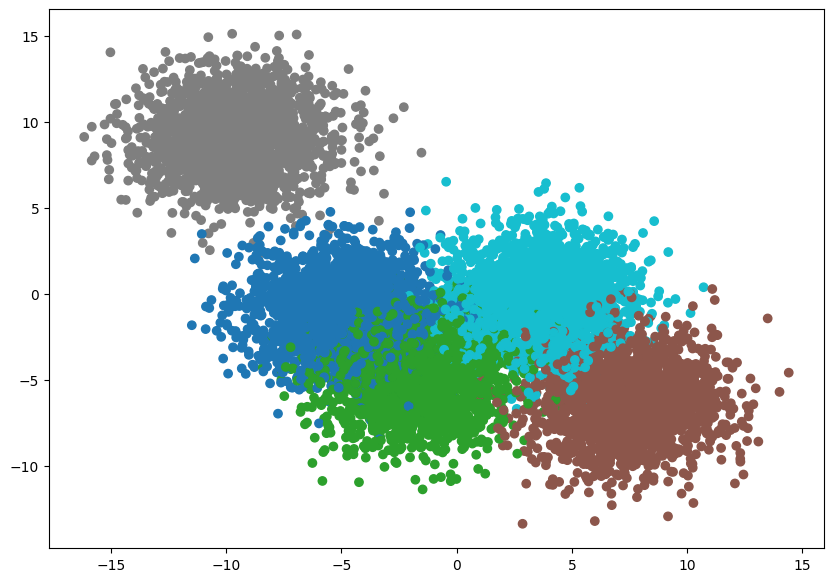

In [170]:
from sklearn.datasets import make_blobs

NClass = 5
NFeats = 2
Seed = 33

X_blob, y_blob = make_blobs(n_samples=10000, # Define the number of data points
                            n_features=NFeats, # X features, we define two so it's a 2D dataset
                            centers=NClass, # Data categories or y labels
                            cluster_std=2, # Standard deviation of the cluster so it's not all in one point
                            random_state=Seed) # Define the random seed for reproducibility

# Transform data to tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

print(X_blob[:5],y_blob[:5])

# Plot the data

plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap=plt.cm.tab10)

Our toy data shows 5 clusters that we can then use for model training

Before we have specified the number of input and output values and hidden units inside our model class as a static value. Another option is provide those values as inputs to the model function


In [171]:
class BlobClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=15): # We give the input option to our model and pre-define a number of hidden units
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features))
        
    def forward(self,x):
        return self.linear_layer_stack(x)

In [172]:
blobModel = BlobClassifier(input_features=NFeats, 
                    output_features=NClass).to('cpu')

blobModel

BlobClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=5, bias=True)
  )
)

In [173]:
# Creating loss and optimizer for the model
loss_fn = nn.CrossEntropyLoss()

optim_fn = torch.optim.SGD(blobModel.parameters(),
                           lr=0.1)

In [174]:
# Data split and untrained prediction

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=Seed
)

blobModel(X_train.to('cpu'))

tensor([[ 0.2290, -0.0360,  0.4494,  0.1582,  0.1172],
        [ 0.2058, -0.0710,  0.3895,  0.1587,  0.0066],
        [ 0.1331, -0.0855,  0.4551,  0.2408, -0.0703],
        ...,
        [ 0.2124, -0.0695,  0.4183,  0.1776, -0.0122],
        [ 0.1076, -0.0909,  0.4847,  0.2644, -0.1092],
        [ 0.2286, -0.0324,  0.4614,  0.1621,  0.1140]],
       grad_fn=<AddmmBackward0>)

In contrast with our previous model, for each value of X our model outputs 5 raw values. These are the logits, and can be transformed to the probabilites using a softmax function

In [175]:
y_logits = blobModel(X_train.to('cpu'))
y_pred_probs = torch.softmax(y_logits, dim=1)

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.2290, -0.0360,  0.4494,  0.1582,  0.1172],
        [ 0.2058, -0.0710,  0.3895,  0.1587,  0.0066],
        [ 0.1331, -0.0855,  0.4551,  0.2408, -0.0703],
        [ 0.2232, -0.0552,  0.4538,  0.1677,  0.0827],
        [ 0.2251, -0.0382,  0.4526,  0.1607,  0.1076]],
       grad_fn=<SliceBackward0>)
tensor([[0.2066, 0.1585, 0.2576, 0.1925, 0.1848],
        [0.2113, 0.1602, 0.2539, 0.2016, 0.1731],
        [0.1956, 0.1572, 0.2699, 0.2178, 0.1596],
        [0.2070, 0.1567, 0.2607, 0.1958, 0.1798],
        [0.2062, 0.1584, 0.2588, 0.1933, 0.1833]], grad_fn=<SliceBackward0>)


The way to interpret this is that the model gives the probabilities that our value corresponds to a category. If you sum the values for each point, all equal to 1. You can try using `torch.sum(y_pred_probs)`.

This structure means, that, unlike the binary classification model, we can't simply round the values to classify it as 0 or 1. For this, the index of the highest value is taken, using `torch.argmax()`. Let's see it for our first point

In [176]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2066, 0.1585, 0.2576, 0.1925, 0.1848], grad_fn=<SelectBackward0>)
tensor(2)


Now we can create the train and test loop

In [177]:
# Define reproducibility seed
torch.manual_seed(33)

# Define number of epochs
epochs = 1000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to('cpu'), y_blob_train.to('cpu')
X_blob_test, y_blob_test = X_blob_test.to('cpu'), y_blob_test.to('cpu')

# Track different values 
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    
    # Set the model to training mode
    blobModel.train()
    
    # Forward pass
    y_logits = blobModel(X_blob_train)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1) # Go from logits to prediction probabilities to the label 
    
    # Calculate loss and accuracy
    loss = loss_fn(y_logits,y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    
    # Optimizer zero grad
    optim_fn.zero_grad()
    
    # Backpropagation loss
    loss.backward()
    
    # Gradient descent
    optim_fn.step()
    
    ## testing
    blobModel.eval()
    with torch.inference_mode():
        
        # Forward pass
        test_logits = blobModel(X_blob_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        
        # Test loss and accuracy
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_pred)
        
        if epoch % 100 == 0: 
        
            print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

Epoch: 0 | Loss: 1.74525 , Accuracy: 0.03% | Test loss: 1.45716, Test acc: 20.20%
Epoch: 100 | Loss: 0.28196 , Accuracy: 89.50% | Test loss: 0.27600, Test acc: 89.45%
Epoch: 200 | Loss: 0.24350 , Accuracy: 90.85% | Test loss: 0.23950, Test acc: 90.35%
Epoch: 300 | Loss: 0.22436 , Accuracy: 91.46% | Test loss: 0.22184, Test acc: 90.70%
Epoch: 400 | Loss: 0.21344 , Accuracy: 91.74% | Test loss: 0.21173, Test acc: 91.65%
Epoch: 500 | Loss: 0.20684 , Accuracy: 91.81% | Test loss: 0.20557, Test acc: 91.85%
Epoch: 600 | Loss: 0.20248 , Accuracy: 92.03% | Test loss: 0.20140, Test acc: 92.05%
Epoch: 700 | Loss: 0.19952 , Accuracy: 92.12% | Test loss: 0.19850, Test acc: 92.25%
Epoch: 800 | Loss: 0.19745 , Accuracy: 92.16% | Test loss: 0.19646, Test acc: 92.25%
Epoch: 900 | Loss: 0.19606 , Accuracy: 92.22% | Test loss: 0.19509, Test acc: 92.35%


We see a sharp increase in accuracies and decrease in losses! Our model performs very well. We can visualize the data now

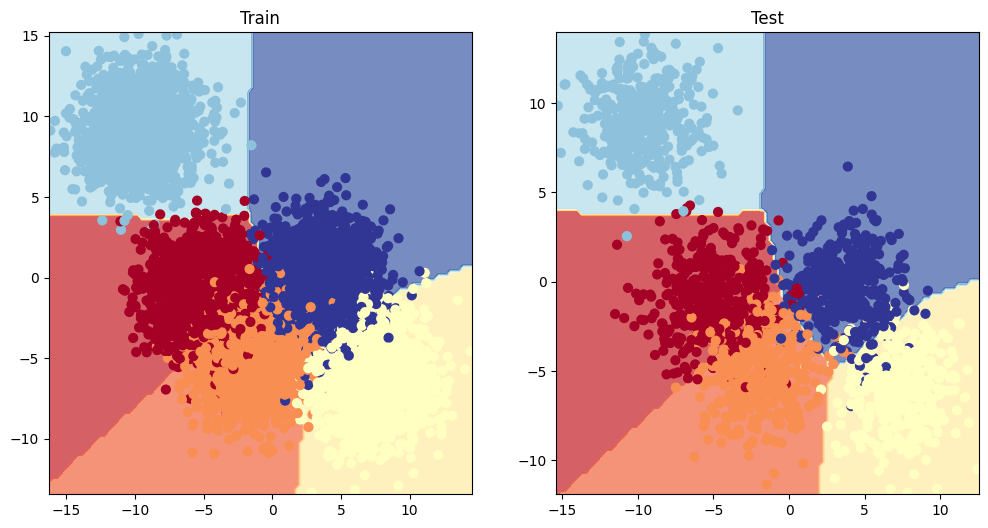

In [178]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(blobModel, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(blobModel, X_blob_test, y_blob_test)


Finally, we save the model state

In [179]:
Mods_Path = Path("models")

Mod_Name = "02_multilevel_classification_blobs_model.pth" # .pth and .pt are standard PyTorch file extensions
Mod_Saving_Path = Mods_Path / Mod_Name

print(f"Saving path is {Mod_Saving_Path}")

# Save the model state dict
torch.save(obj = model_0.state_dict(), f = Mod_Saving_Path)

Saving path is models/02_multilevel_classification_blobs_model.pth


In [ ]:
def plot_prediction(train_data,train_labels,test_data,test_labels,predictions=None):
    
    """
    Plots training data and testing data with their corresponding labels while also plotting the predictions if provided
    """
    # Define figure size
    plt.figure(figsize=(5,3))
    # Plot training and testing data using different colors and labels
    plt.scatter(train_data,train_labels,c='b',s=10,alpha=0.4,label="Training set")
    plt.scatter(test_data,test_labels,c='r',s=10,alpha=0.4,label="Testing set")
    plt.xlabel("Data")
    plt.ylabel("Labels")
    
    # Plot predictions if available
    if predictions is not None:
        plt.scatter(test_data,predictions,c='k',marker='D',s=10,alpha=0.7,label="Predictions")
        
    plt.legend()
    
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())